In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/natural-images/natural_images/motorbike/motorbike_0786.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0344.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0360.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0010.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0125.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0211.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0135.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0769.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0146.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0456.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0253.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0091.jpg
/kaggle/input/natural-images/natural_images/motorbike/motorbike_0129.jpg
/kaggle/input/natural-images/natural_images/motorbi

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import time


In [5]:
import os
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

# Set dataset path
DATASET_PATH = "/kaggle/input/natural-images/natural_images"

# List available classes
classes = os.listdir(DATASET_PATH)
print(f"Classes: {classes}")

# Count images per class
for category in classes:
    print(f"{category}: {len(os.listdir(os.path.join(DATASET_PATH, category)))} images")


Classes: ['motorbike', 'airplane', 'flower', 'dog', 'fruit', 'car', 'cat', 'person']
motorbike: 788 images
airplane: 727 images
flower: 843 images
dog: 702 images
fruit: 1000 images
car: 968 images
cat: 885 images
person: 986 images


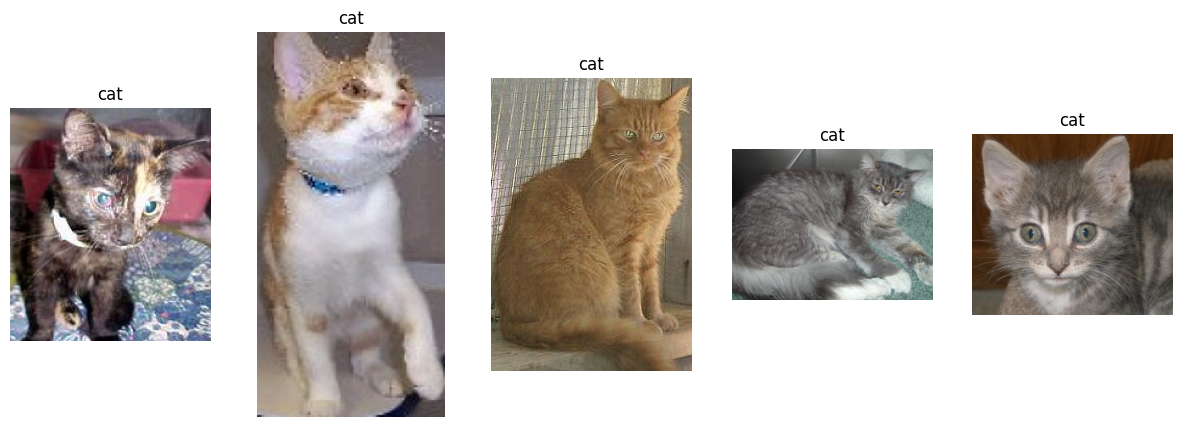

In [6]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import os

def show_images(class_name, num_images=5):
    """Displays sample images from a given class."""
    class_path = os.path.join(DATASET_PATH, class_name)
    image_files = random.sample(os.listdir(class_path), num_images)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for idx, img_name in enumerate(image_files):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        axes[idx].imshow(img)
        axes[idx].axis("off")
        axes[idx].set_title(class_name)

    plt.show()

# Show random images from a class (change to any class)
show_images("cat")


In [7]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize
])

# Load dataset with transformations
dataset = datasets.ImageFolder(root=DATASET_PATH, transform=transform)

# Split dataset (80% train, 20% validation)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Check dataset size
print(f"Training images: {len(train_dataset)}")
print(f"Validation images: {len(val_dataset)}")


Training images: 5519
Validation images: 1380


In [8]:
import torch
import torch.nn as nn
import torchvision.models as models

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load the pretrained ResNet-50 model
model = models.resnet50(pretrained=True)

# Modify the last fully connected layer for 8 classes
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 8)

# Move model to GPU (if available)
model = model.to(device)

# Print model architecture
print(model)


Using device: cuda


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
import torch.optim as optim

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Print confirmation
print("Loss function and optimizer are set!")


Loss function and optimizer are set!


In [10]:
num_epochs = 5  # Set number of epochs

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Reset gradients

        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss

        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

print("Training complete!")


Epoch [1/5], Loss: 0.4584
Epoch [2/5], Loss: 0.2404
Epoch [3/5], Loss: 0.1433
Epoch [4/5], Loss: 0.1391
Epoch [5/5], Loss: 0.1001
Training complete!


In [11]:
from torchmetrics.classification import MulticlassAccuracy

# Set model to evaluation mode
model.eval()

# Initialize accuracy metric
accuracy_metric = MulticlassAccuracy(num_classes=8).to(device)

correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get predicted class

        correct += (predicted == labels).sum().item()
        total += labels.size(0)

# Compute accuracy
accuracy = correct / total * 100
print(f"Validation Accuracy: {accuracy:.2f}%")


Validation Accuracy: 97.32%


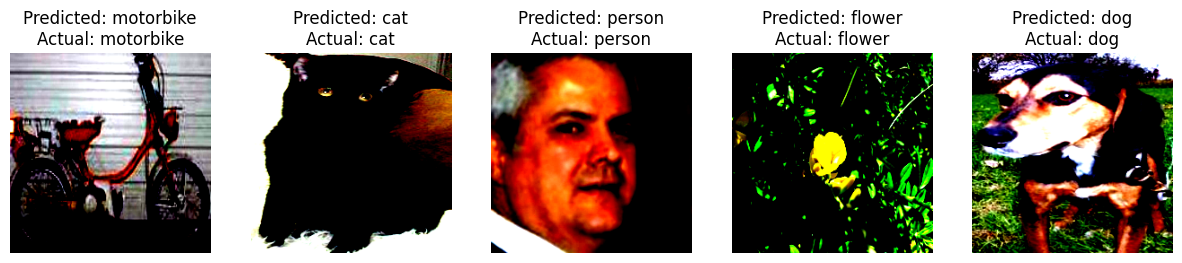

In [12]:
import numpy as np

# Class names
# Corrected class names
class_names = ['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']
, 'person']

# Select random images from validation set
num_test_images = 5
indices = np.random.randint(0, len(val_dataset), num_test_images)

fig, axes = plt.subplots(1, num_test_images, figsize=(15, 5))

for i, idx in enumerate(indices):
    image, label = val_dataset[idx]
    image_tensor = image.unsqueeze(0).to(device)  # Add batch dimension

    # Predict
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted_label = torch.max(output, 1)
    
    # Convert tensor to numpy and show image
    axes[i].imshow(image.permute(1, 2, 0).cpu().numpy())  
    axes[i].axis("off")
    axes[i].set_title(f"Predicted: {class_names[predicted_label.item()]}\nActual: {class_names[label]}")

plt.show()


In [ ]:
# Save the trained model
model_path = "natural_images_resnet50.pth"
torch.save(model.state_dict(), model_path)

print(f"Model saved as {model_path}")


In [13]:
# Load model safely with weights_only=True
model.load_state_dict(torch.load("natural_images_resnet50.pth", weights_only=True))
model.eval()  # Set to evaluation mode

print("Model loaded successfully!")


Model loaded successfully!


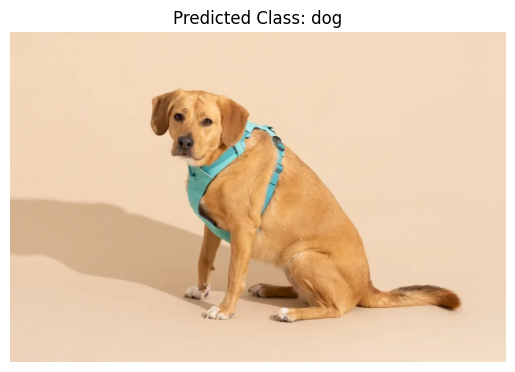

In [14]:
import requests
from PIL import Image
import torchvision.transforms as transforms
from io import BytesIO

# URL of the image (replace with any image link)
image_url = "https://cdn.thewirecutter.com/wp-content/media/2021/03/dogharnesses-2048px-6907-1024x682.webp"

# Download the image
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert("RGB")

# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Apply transformations
image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

# Predict the class
model.eval()
with torch.no_grad():
    output = model(image_tensor)
    _, predicted_label = torch.max(output, 1)

# Show image with prediction
plt.imshow(image)
plt.axis("off")
plt.title(f"Predicted Class: {class_names[predicted_label.item()]}")
plt.show()


In [15]:
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

# Define transformations (same as training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load dataset
dataset = datasets.ImageFolder(root="/kaggle/input/natural-images/natural_images", transform=transform)

# Split dataset (80% train, 20% test)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoader for test dataset
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Test Accuracy: 98.55%

Classification Report:
              precision    recall  f1-score   support

    airplane       1.00      0.98      0.99       152
         car       0.98      1.00      0.99       179
         cat       0.99      0.94      0.96       162
         dog       0.94      0.99      0.96       151
      flower       0.98      0.99      0.99       174
       fruit       1.00      1.00      1.00       188
   motorbike       1.00      1.00      1.00       160
      person       1.00      0.99      0.99       214

    accuracy                           0.99      1380
   macro avg       0.99      0.98      0.98      1380
weighted avg       0.99      0.99      0.99      1380



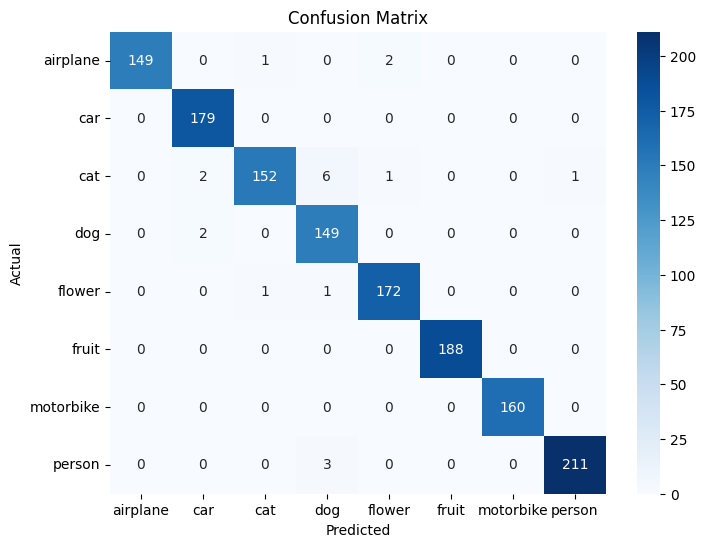

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Set model to evaluation mode
model.eval()

# Store predictions and actual labels
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:  # Ensure test_loader is defined
        images = images.to(device)
        labels = labels.to(device)
        
        # Get predictions
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        # Store labels
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Compute accuracy
resnet50_accuracy = accuracy_score(y_true, y_pred) * 100  # Multiply by 100 for percentage
print(f"Test Accuracy: {resnet50_accuracy:.2f}%")  # ✅ Fixed Variable Name

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [17]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load EfficientNet model (pretrained on ImageNet)
efficientnet = models.efficientnet_b0(pretrained=True)

# Modify the last layer for our 8-class classification
num_features = efficientnet.classifier[1].in_features
efficientnet.classifier[1] = nn.Linear(num_features, len(class_names))  # 8 classes

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
efficientnet = efficientnet.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(efficientnet.parameters(), lr=0.0001)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
import torch.optim as optim

# Training parameters
num_epochs = 5  # Adjust as needed
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Ensure train_loader is defined

# Training loop
efficientnet.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Clear gradients
        outputs = efficientnet(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")

print("Training Completed!")


Epoch [1/5], Loss: 62.5564, Accuracy: 94.98%
Epoch [2/5], Loss: 5.9610, Accuracy: 99.15%
Epoch [3/5], Loss: 2.5871, Accuracy: 99.67%
Epoch [4/5], Loss: 2.5312, Accuracy: 99.62%
Epoch [5/5], Loss: 1.3995, Accuracy: 99.87%
Training Completed!


Test Accuracy (EfficientNet): 99.49%

Classification Report (EfficientNet):
              precision    recall  f1-score   support

    airplane       1.00      0.99      1.00       152
         car       1.00      1.00      1.00       179
         cat       0.99      0.98      0.98       162
         dog       0.97      0.99      0.98       151
      flower       0.99      0.99      0.99       174
       fruit       1.00      1.00      1.00       188
   motorbike       1.00      1.00      1.00       160
      person       1.00      1.00      1.00       214

    accuracy                           0.99      1380
   macro avg       0.99      0.99      0.99      1380
weighted avg       0.99      0.99      0.99      1380



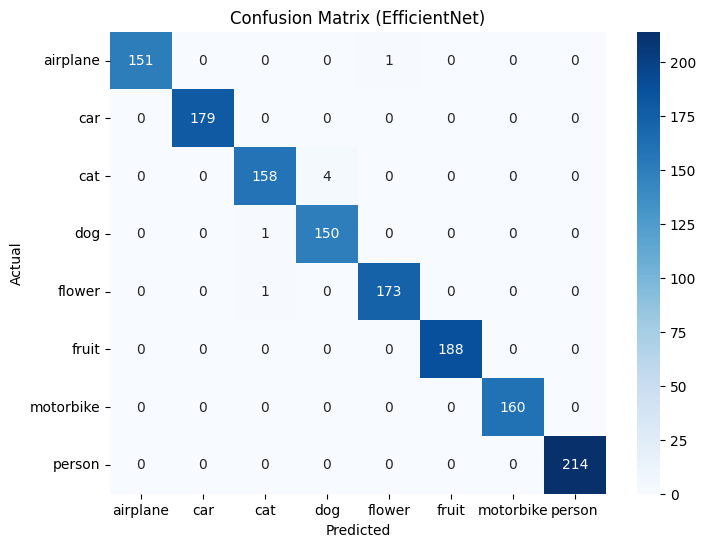

In [21]:
# Set EfficientNet model to evaluation mode
efficientnet.eval()

# Store predictions and actual labels
y_true_efficient = []
y_pred_efficient = []

with torch.no_grad():
    for images, labels in test_loader:  # Ensure test_loader is defined
        images = images.to(device)
        labels = labels.to(device)
        
        # Get predictions
        outputs = efficientnet(images)
        _, predicted = torch.max(outputs, 1)
        
        # Store labels
        y_true_efficient.extend(labels.cpu().numpy())
        y_pred_efficient.extend(predicted.cpu().numpy())

# Compute accuracy
efficientnet_accuracy = accuracy_score(y_true_efficient, y_pred_efficient) * 100
print(f"Test Accuracy (EfficientNet): {efficientnet_accuracy:.2f}%")  

# Generate classification report
print("\nClassification Report (EfficientNet):")
print(classification_report(y_true_efficient, y_pred_efficient, target_names=class_names))

# Generate confusion matrix
cm_efficient = confusion_matrix(y_true_efficient, y_pred_efficient)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_efficient, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (EfficientNet)")
plt.show()


In [24]:
# Define model names and their test accuracies
model_comparison = {
    "ResNet50": resnet50_accuracy,  # Replace with actual accuracy
    "EfficientNet": efficientnet_accuracy  # Replace with actual accuracy
}

# Print comparison
for model, accuracy in model_comparison.items():
    print(f"{model}: {accuracy:.2f}% Test Accuracy")


ResNet50: 98.55% Test Accuracy
EfficientNet: 99.49% Test Accuracy


In [29]:
import torch
import torchvision.models as models

# Load pretrained VGG16 model
vgg16_model = models.vgg16(pretrained=True)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16_model = vgg16_model.to(device)

# Print model architecture
print(vgg16_model)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 214MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [30]:
import torch.nn as nn

# Get the number of input features from the last FC layer
num_features = vgg16_model.classifier[6].in_features

# Modify the last fully connected layer
vgg16_model.classifier[6] = nn.Linear(num_features, len(class_names))  # class_names contains the unique labels

# Move to GPU if available
vgg16_model = vgg16_model.to(device)

# Print modified model
print(vgg16_model.classifier)


Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=8, bias=True)
)


In [31]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16_model.parameters(), lr=0.001)

# Training loop
num_epochs = 10  # You can increase this
for epoch in range(num_epochs):
    vgg16_model.train()  # Set model to training mode
    running_loss = 0.0
    correct, total = 0, 0
    
    for images, labels in train_loader:  # train_loader contains training data
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()  # Clear previous gradients
        outputs = vgg16_model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
    
    train_accuracy = (correct / total) * 100
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

print("Training Complete! 🚀")


Epoch [1/10], Loss: 1.4476, Accuracy: 46.75%
Epoch [2/10], Loss: 0.6047, Accuracy: 78.35%
Epoch [3/10], Loss: 0.5139, Accuracy: 81.99%
Epoch [4/10], Loss: 0.3730, Accuracy: 86.59%
Epoch [5/10], Loss: 0.3786, Accuracy: 86.45%
Epoch [6/10], Loss: 1.3054, Accuracy: 62.53%
Epoch [7/10], Loss: 1.3232, Accuracy: 52.26%
Epoch [8/10], Loss: 0.6113, Accuracy: 78.02%
Epoch [9/10], Loss: 0.4391, Accuracy: 83.67%
Epoch [10/10], Loss: 0.3611, Accuracy: 86.75%
Training Complete! 🚀


Test Accuracy (VGG16): 84.49%

Classification Report (VGG16):
              precision    recall  f1-score   support

    airplane       0.98      0.88      0.92       152
         car       0.99      0.93      0.96       179
         cat       0.55      0.73      0.63       162
         dog       0.46      0.50      0.48       151
      flower       0.92      0.72      0.81       174
       fruit       1.00      0.99      1.00       188
   motorbike       1.00      0.97      0.99       160
      person       0.96      0.95      0.95       214

    accuracy                           0.84      1380
   macro avg       0.86      0.84      0.84      1380
weighted avg       0.87      0.84      0.85      1380



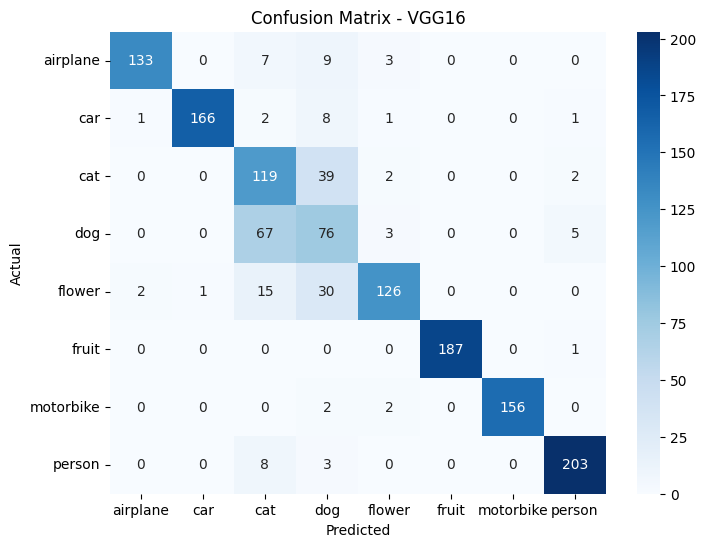

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Set model to evaluation mode
vgg16_model.eval()

# Store predictions and actual labels
y_true_vgg = []
y_pred_vgg = []

with torch.no_grad():
    for images, labels in test_loader:  # test_loader contains the test dataset
        images = images.to(device)
        labels = labels.to(device)
        
        # Get predictions
        outputs = vgg16_model(images)
        _, predicted = torch.max(outputs, 1)
        
        # Store labels
        y_true_vgg.extend(labels.cpu().numpy())
        y_pred_vgg.extend(predicted.cpu().numpy())

# Compute accuracy
vgg16_accuracy = accuracy_score(y_true_vgg, y_pred_vgg)
print(f"Test Accuracy (VGG16): {vgg16_accuracy * 100:.2f}%")

# Generate classification report
print("\nClassification Report (VGG16):")
print(classification_report(y_true_vgg, y_pred_vgg, target_names=class_names))

# Generate confusion matrix
cm_vgg = confusion_matrix(y_true_vgg, y_pred_vgg)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_vgg, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - VGG16")
plt.show()


In [34]:
# Load Pretrained ViT Model
vit_model = models.vit_b_16(pretrained=True)

# Modify the final layer for our number of classes
num_classes = len(class_names)  # Make sure class_names is defined
vit_model.heads.head = torch.nn.Linear(in_features=768, out_features=num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vit_model.to(device)

print("ViT model loaded successfully!")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:01<00:00, 226MB/s] 


ViT model loaded successfully!


In [38]:
# Save ViT model weights
vit_model_path = "/kaggle/working/natural_images_vit.pth"
torch.save(vit_model.state_dict(), vit_model_path)

print("ViT model saved successfully!")


ViT model saved successfully!


In [45]:
vit_model_path = "/kaggle/working/natural_images_vit.pth"

# Check if the file exists
import os
if os.path.exists(vit_model_path):
    vit_model.load_state_dict(torch.load(vit_model_path, map_location=device))
    print("✅ Pretrained ViT weights loaded successfully!")
else:
    print("❌ ViT model file not found! The model is randomly initialized.")


✅ Pretrained ViT weights loaded successfully!


<ipython-input-45-6045768bfb99>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vit_model.load_state_dict(torch.load(vit_model_path, map_location=device))


In [46]:
# Recommended transformation for ViT (ImageNet-trained)
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize to match ViT input size
    transforms.ToTensor(),            # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard normalization
])


In [47]:
vit_model.to(device)  # Ensure model is on GPU
vit_model.eval()  # Set to evaluation mode


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [42]:
# Ensure these lists are defined before using them
y_true_vit = []
y_pred_vit = []

# Move model to evaluation mode
vit_model.eval()

# Perform inference
with torch.no_grad():  # Disable gradient computation
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)  # Move to GPU

        # Forward pass
        outputs = vit_model(images)
        _, predicted = torch.max(outputs, 1)  # Get predicted class

        # Store labels and predictions
        y_true_vit.extend(labels.cpu().numpy())   # Move labels to CPU before converting to numpy
        y_pred_vit.extend(predicted.cpu().numpy())  # Move predictions to CPU


In [43]:
from sklearn.metrics import accuracy_score

vit_accuracy = accuracy_score(y_true_vit, y_pred_vit) * 100
print(f"ViT Test Accuracy: {vit_accuracy:.2f}%")


ViT Test Accuracy: 10.51%


In [44]:
# Update model comparison
model_comparison["ViT"] = vit_accuracy

# Print updated comparison
for model, accuracy in model_comparison.items():
    print(f"{model}: {accuracy:.2f}% Test Accuracy")


ResNet50: 98.55% Test Accuracy
EfficientNet: 99.49% Test Accuracy
ViT: 10.51% Test Accuracy
